In [8]:
import astropy
from astropy.io import fits 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from astropy.time import Time

In [9]:
file = '/Users/katborski/Documents/GitHub/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits'
data1 = astropy.io.fits.open(file)

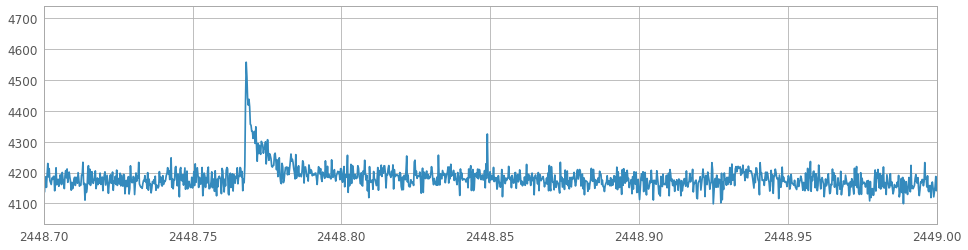

In [10]:
with fits.open(file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

plt.figure(figsize = (16,4))
plt.xlim(2448.7,2449)
plt.plot(tess_bjds, pdcsap_fluxes)
plt.show()

In [11]:
nanDay = np.array(np.where(np.isnan(tess_bjds)))
nanFlux = np.array(np.where(np.isnan(pdcsap_fluxes)))


In [12]:
#tess_bjds1 = list(np.delete(tess_bjds,nanDay))
#len(tess_bjds1)

In [13]:
#tess_fluxes = list(np.delete(pdcsap_fluxes,nanFlux))
#len(tess_fluxes)

In [14]:
#removes nan values from original time and flux values
tessTIME = [x for x in tess_bjds if np.isnan(x) == False]
tessFLUX = [y for y in pdcsap_fluxes if np.isnan(y) == False]

In [15]:
len(tessTIME)

106050

In [16]:
len(tessFLUX)

66884

In [19]:
tess_flux = list(np.delete(tessFLUX, nanDay))
len(tess_flux)

62879

In [12]:
tess_time = list(np.delete(tessTIME, nanFlux))

IndexError: index 106050 is out of bounds for axis 0 with size 106050